## Research of prices volatility between ETH-BTC pair

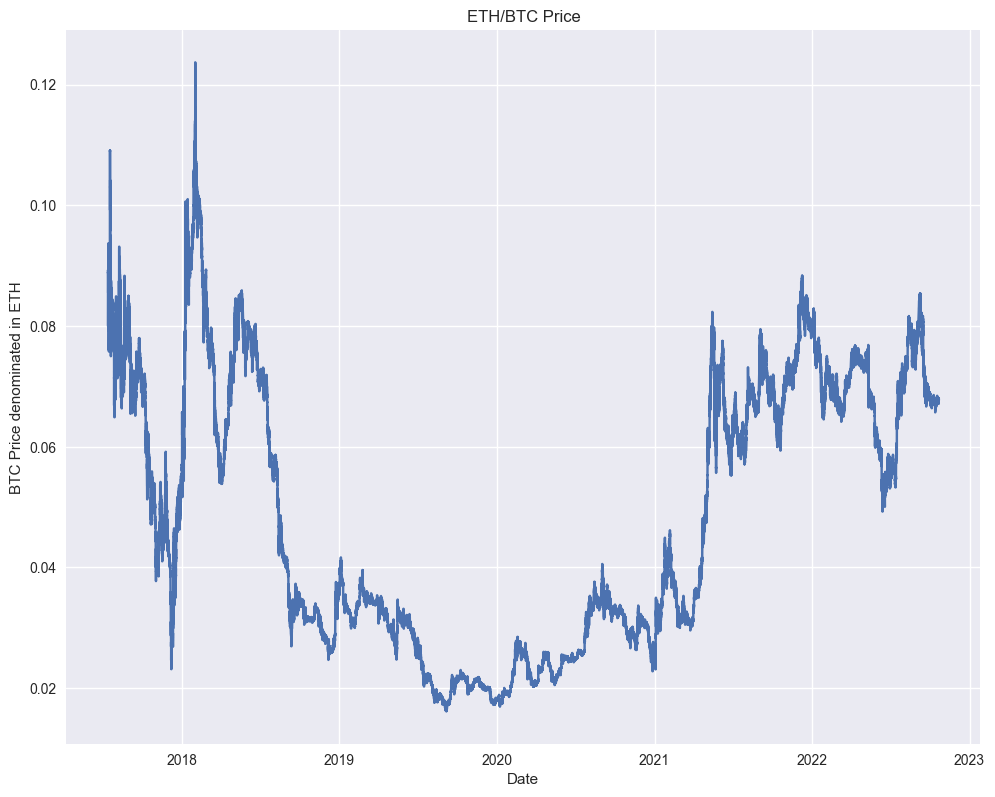

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn')
pd.set_option('display.max_rows', 500)

df = pd.read_parquet("ETH-BTC.parquet")

fig, ax = plt.subplots()
fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(10)

line = ax.plot(df.reset_index()['open_time'].tolist(), df['close'].tolist())
ax.set_title('ETH/BTC Price')
ax.set_ylabel('BTC Price denominated in ETH')
ax.set_xlabel('Date')
plt.show()

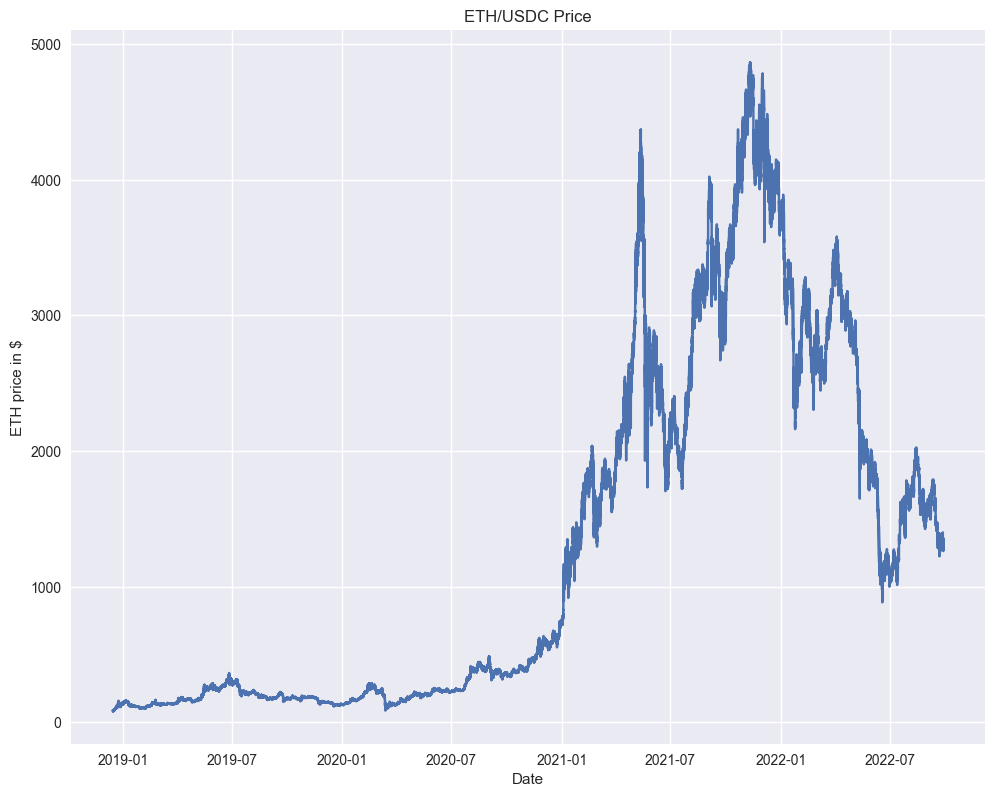

In [7]:
df = pd.read_parquet("ETH-USDC.parquet")

fig, ax = plt.subplots()
fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(10)

line_usd = ax.plot(df.reset_index()['open_time'].tolist(), df['close'].tolist())
ax.set_title('ETH/USDC Price')
ax.set_ylabel('ETH price in $')
ax.set_xlabel('Date')
plt.show()